#Ejercicio 12
##Multiplicación de señales: modulación de amplitud simple (AM-DSB)
Misma premisa que en eljercicio anterior pero con un mensaje de 20Hz a 2Khz.

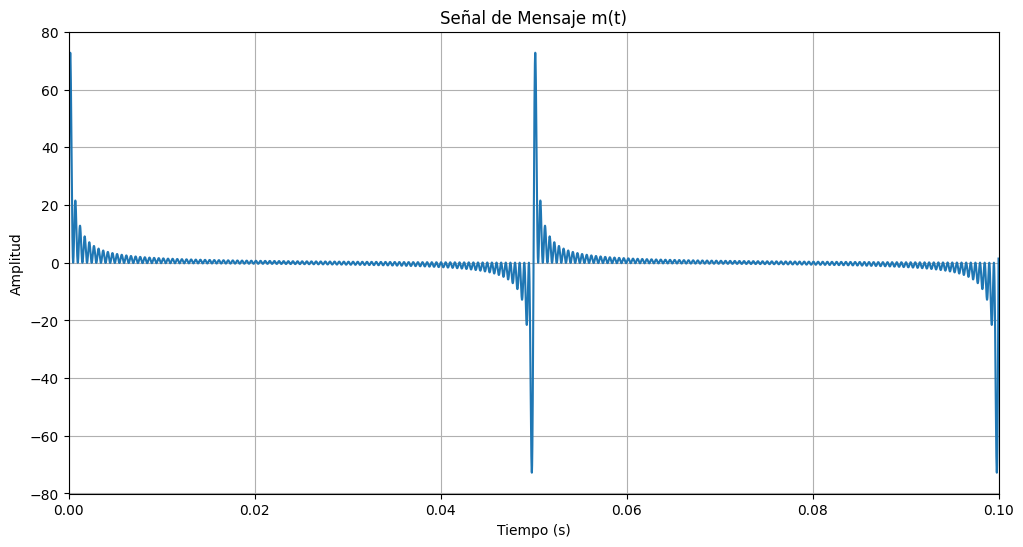

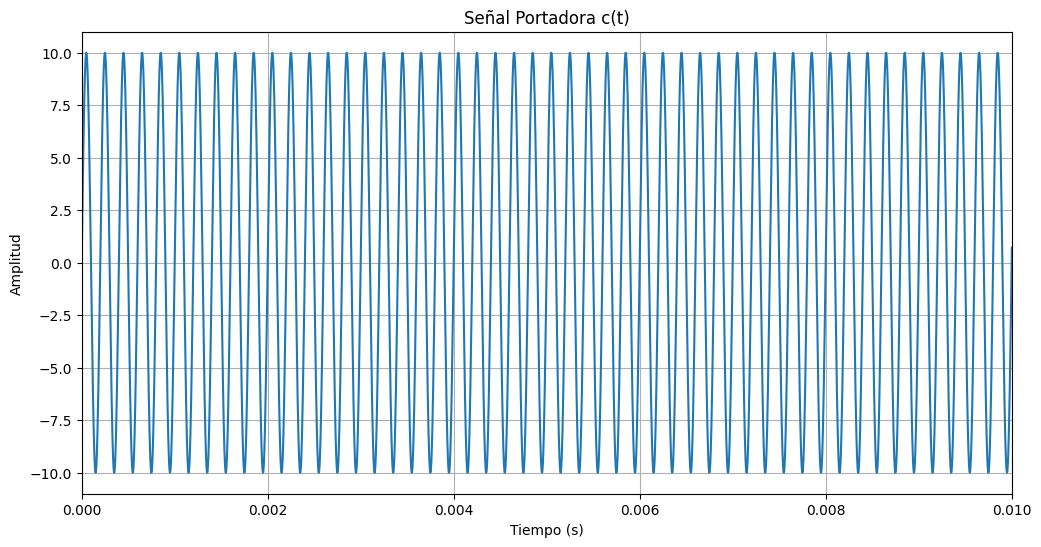

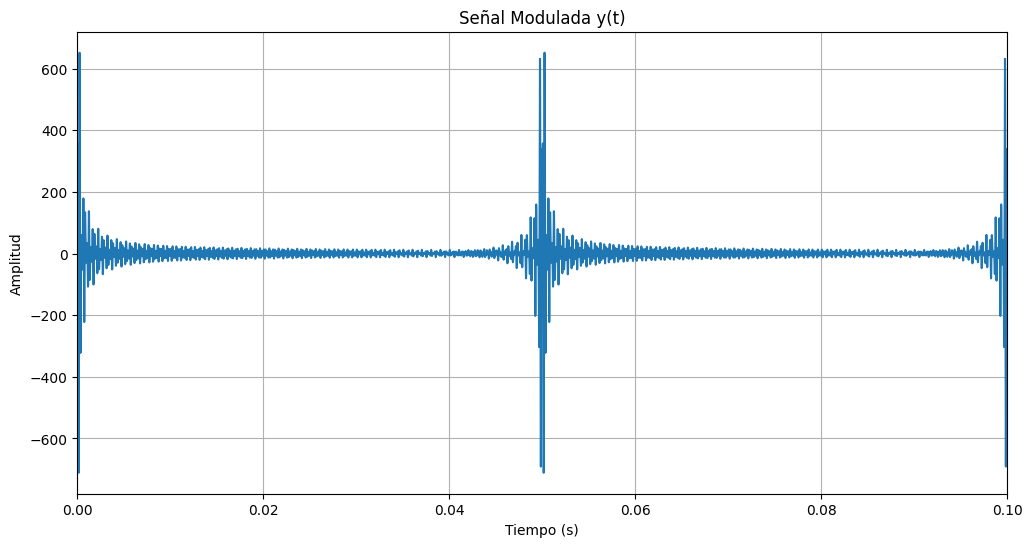

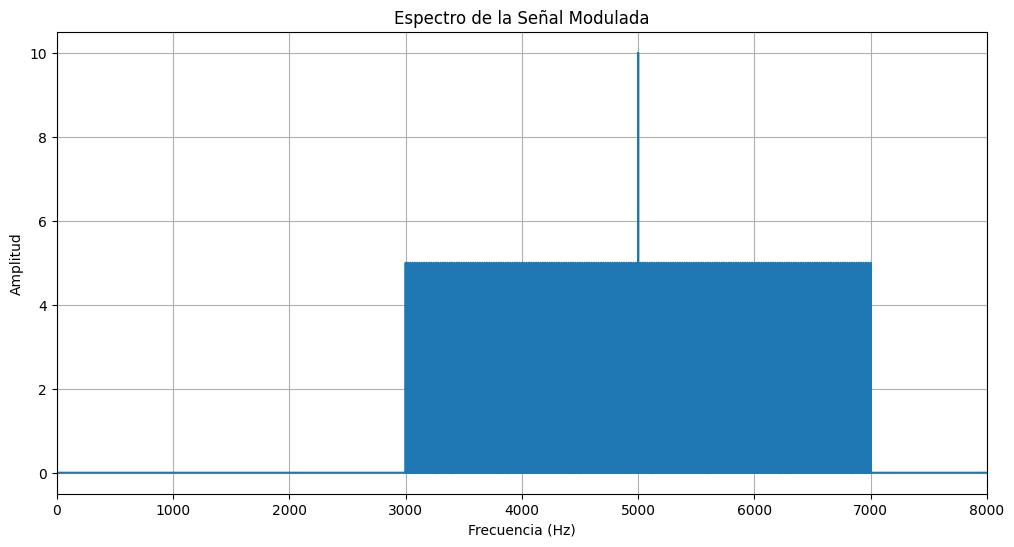

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parámetros de la simulación
fs = 441000  # Frecuencia de muestreo (Hz)
T = 1  # Duración de la señal (s)
t = np.linspace(0, T, int(fs * T), endpoint=False)

# Parámetros de la señal de mensaje
f_mensaje_min = 20  # Frecuencia mínima del mensaje (Hz)
f_mensaje_max = 2000 # Frecuencia máxima del mensaje (Hz)
num_tonos_mensaje = 100
amplitud_mensaje = 1.0

# Generar señal de mensaje m(t)
m_t = np.zeros_like(t)
for i in range(num_tonos_mensaje):
    f_tono = f_mensaje_min + (f_mensaje_max - f_mensaje_min) * i / (num_tonos_mensaje - 1)
    m_t += amplitud_mensaje * np.sin(2 * np.pi * f_tono * t)

# Parámetros de la señal portadora
f_portadora = 5000  # Frecuencia de la portadora (Hz)
amplitud_portadora = 10.0

# Generar señal portadora c(t)
c_t = amplitud_portadora * np.sin(2 * np.pi * f_portadora * t)

# Calcular la señal modulada y(t) = (1 + m(t)) * c(t)
y_t = (1 + m_t) * c_t

# Graficar: Mensaje en el tiempo
plt.figure(figsize=(12, 6))
plt.plot(t, m_t)
plt.title('Señal de Mensaje m(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.xlim([0, 0.1])  # Zoom
plt.grid(True)
plt.show()

# Graficar: Portadora en el tiempo (zoom)
plt.figure(figsize=(12, 6))
plt.plot(t, c_t)
plt.title('Señal Portadora c(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.xlim([0, 0.01])  # Zoom
plt.grid(True)
plt.show()

# Graficar: Señal modulada
plt.figure(figsize=(12, 6))
plt.plot(t, y_t)
plt.title('Señal Modulada y(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.xlim([0, 0.1])  # Zoom
plt.grid(True)
plt.show()

# Calcular el espectro de la modulada (FFT hasta 8 kHz)
N = len(y_t)
yf = fft(y_t)
xf = fftfreq(N, 1 / fs)

plt.figure(figsize=(12, 6))
plt.plot(xf[:N//2], 2/N * np.abs(yf[0:N//2]))
plt.title('Espectro de la Señal Modulada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim([0, 8000])  # Limitar el eje x hasta 8 kHz
plt.grid(True)
plt.show()

Este código simula la Modulación de Amplitud (AM-DSB) con una señal de mensaje compuesta por múltiples tonos.

Explicacion del ódigo:

-Importar Librerías: Importa numpy para operaciones numéricas, matplotlib.pyplot para graficar y scipy.fft para la Transformada Rápida de Fourier.

-Parámetros de Simulación: Establece la frecuencia de muestreo (fs), la duración de la señal (T) y crea un vector de tiempo (t).

-Parámetros de la Señal de Mensaje: Define las frecuencias mínima y máxima (f_mensaje_min, f_mensaje_max), el número de tonos (num_tonos_mensaje) y la amplitud de la señal de mensaje.

-Generar Señal de Mensaje: Crea la señal de mensaje m_t sumando múltiples ondas sinusoidales con frecuencias espaciadas linealmente entre f_mensaje_min y f_mensaje_max.

-Parámetros de la Señal Portadora: Define la frecuencia (f_portadora) y la amplitud de la señal portadora.

-Generar Señal Portadora: Crea la señal portadora c_t como una única onda sinusoidal.

-Calcular Señal Modulada: Calcula la señal modulada AM-DSB y_t utilizando la fórmula (1 + m(t)) * c(t).

-Graficar Señales en el Dominio del Tiempo: Grafica la señal de mensaje, la señal portadora y la señal modulada en el dominio del tiempo, con un zoom para mostrar los detalles.

-Calcular y Graficar Espectro: Calcula la Transformada Rápida de Fourier (FFT) de la señal modulada para obtener su espectro de frecuencia. Luego grafica la magnitud del espectro, limitando el eje x a 8 kHz para enfocarse en las frecuencias relevantes.

Los gráficos muestran la representación en el dominio del tiempo de las señales de mensaje, portadora y modulada, así como el espectro de frecuencia de la señal modulada, ilustrando cómo la señal de mensaje modula la amplitud de la portadora.

